In [1]:
import kagglehub
import csv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

/home/dan/Desktop/Projects/multi-feature-house-prediction/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
# directory_path = Path(path)

# # Find the CSV file in the directory
# csv_file = next(directory_path.glob("*.csv"))
# print(path)
# lines = csv_file.read_text().split("\n")

path = Path('./Housing.csv')
lines = path.read_text().split("\n")
reader = csv.reader(lines)
header_row = next(reader)

for col in range(len(header_row)):
    print(f"Column {col}: {header_row[col]}")


Column 0: price
Column 1: area
Column 2: bedrooms
Column 3: bathrooms
Column 4: stories
Column 5: mainroad
Column 6: guestroom
Column 7: basement
Column 8: hotwaterheating
Column 9: airconditioning
Column 10: parking
Column 11: prefarea
Column 12: furnishingstatus


In [3]:
# Retrieving Data from CSV
m = 0
n = 4 # Features: Area, Bedrooms, Bathrooms, Stories
x_data_list, y_data_list = [], []

for row in reader:
    m += 1
    y_data_list.append(float(row[0]))
    x_data_list.append([
        float(row[1]),
        float(row[2]),
        float(row[3]),
        float(row[4])
    ])

y_data = np.array(y_data_list)
x_data = np.array(x_data_list)

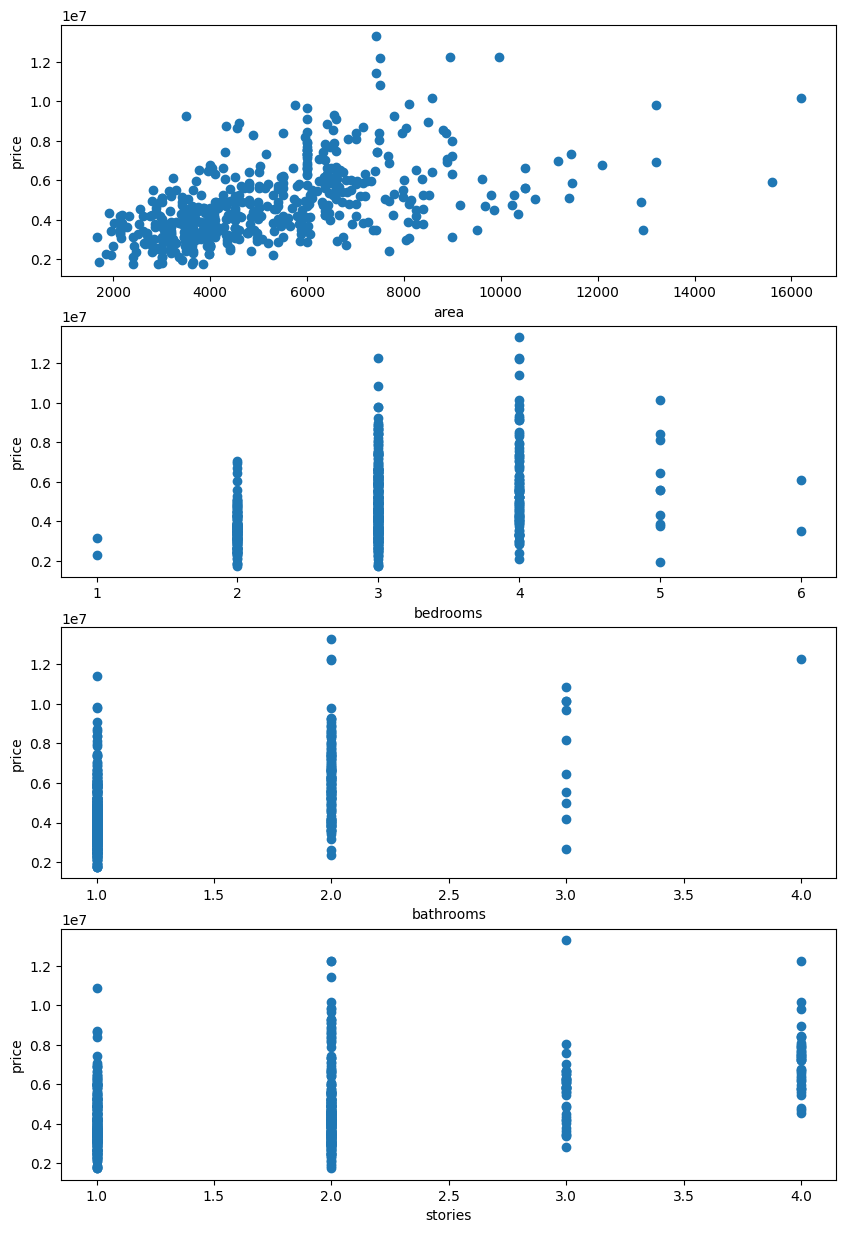

In [4]:
fig, ax = plt.subplots(n,figsize=(10,15))

for i in range(n):
    ax[i].scatter(x_data[:,i], y_data)
    ax[i].set_xlabel(header_row[i+1])
    ax[i].set_ylabel(header_row[0])
    
plt.show()

In [5]:
# Training the model with non normalized data
reg = LinearRegression().fit(x_data, y_data)
y_predict = reg.predict(x_data)
print(y_predict)
print(f"R^2: {reg.score(x_data, y_data)}")
# R^2: 0.5355960442835979

[ 7326017.9251189  10843211.50192761  7561389.47225783  6824824.87028828
  5594242.44267015  7295114.84034423  9498621.74552692 11529513.37230636
  5852659.0545773   7024676.64335441  7592488.14983345  7454968.69965154
  6463801.66247681  5304727.15318737  6740536.70502334  5054607.75309933
  6482802.88394057  8069743.82386129  5524458.53134261  6216102.99262352
  4217871.21786944  5963825.93896817  5103767.32989339  5509257.5541716
  7120561.13429856  6460001.41818406  7119682.75067322  5417287.48404545
  7194131.35750964  6064776.01173782  7680218.78385418  6299526.70667234
  5829160.86558718  7241472.22843303  5572123.76773803  7499707.17994845
  7151283.94568646  8458051.53254641  5919502.27739711  7317978.24472073
  5065325.6951532   7256491.5452123   7302094.47672533  7317978.24472073
  7317978.24472073  6588087.74150058  7119682.75067322  6147516.93496225
  5410451.20256004  6072132.90131161  7666917.92882955  6043010.21691156
  7317978.24472073  6796661.98578928  6056492.732327

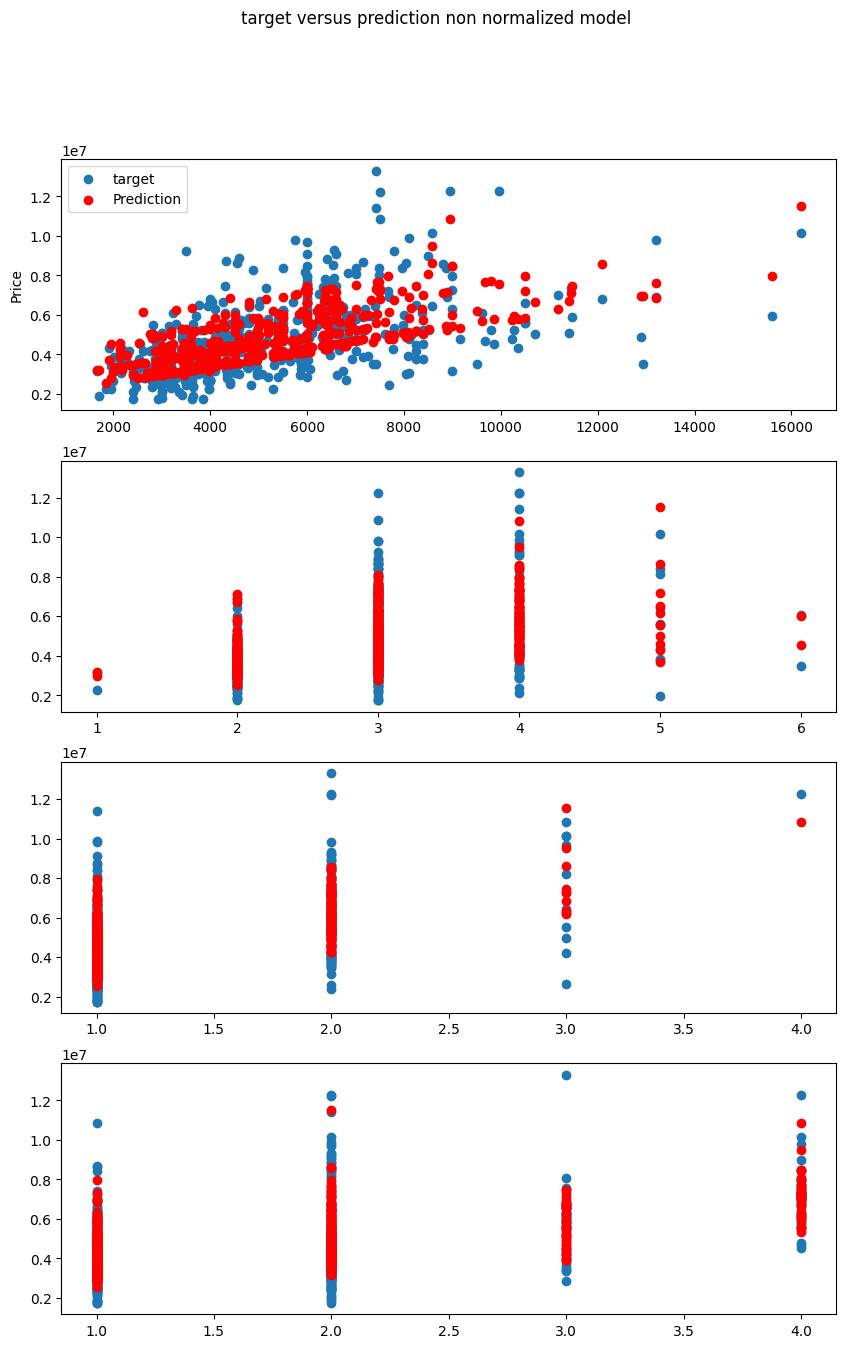

In [6]:
fig2, ax2 = plt.subplots(n,figsize=(10,15))
for i in range(n):
    ax2[i].scatter(x_data[:,i], y_data,label = 'target')
    # Prediction
    ax2[i].scatter(x_data[:,i],y_predict,color="red",label="Prediction")
ax2[0].set_ylabel("Price"); ax2[0].legend();
fig2.suptitle("target versus prediction non normalized model")
plt.show()

In [7]:
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_data,axis=0)}") 
# Normalize the data
scaler = StandardScaler()
x_data_normalized = scaler.fit_transform(x_data)

# Fit the model
reg2 = LinearRegression().fit(x_data_normalized, y_data)
y_predict2 = reg2.predict(x_data_normalized)
# Evaluate the model
print(f"R^2: {reg2.score(x_data_normalized, y_data)}")

Peak to Peak range by column in Raw        X:[1.455e+04 5.000e+00 3.000e+00 3.000e+00]
R^2: 0.5355960442835981


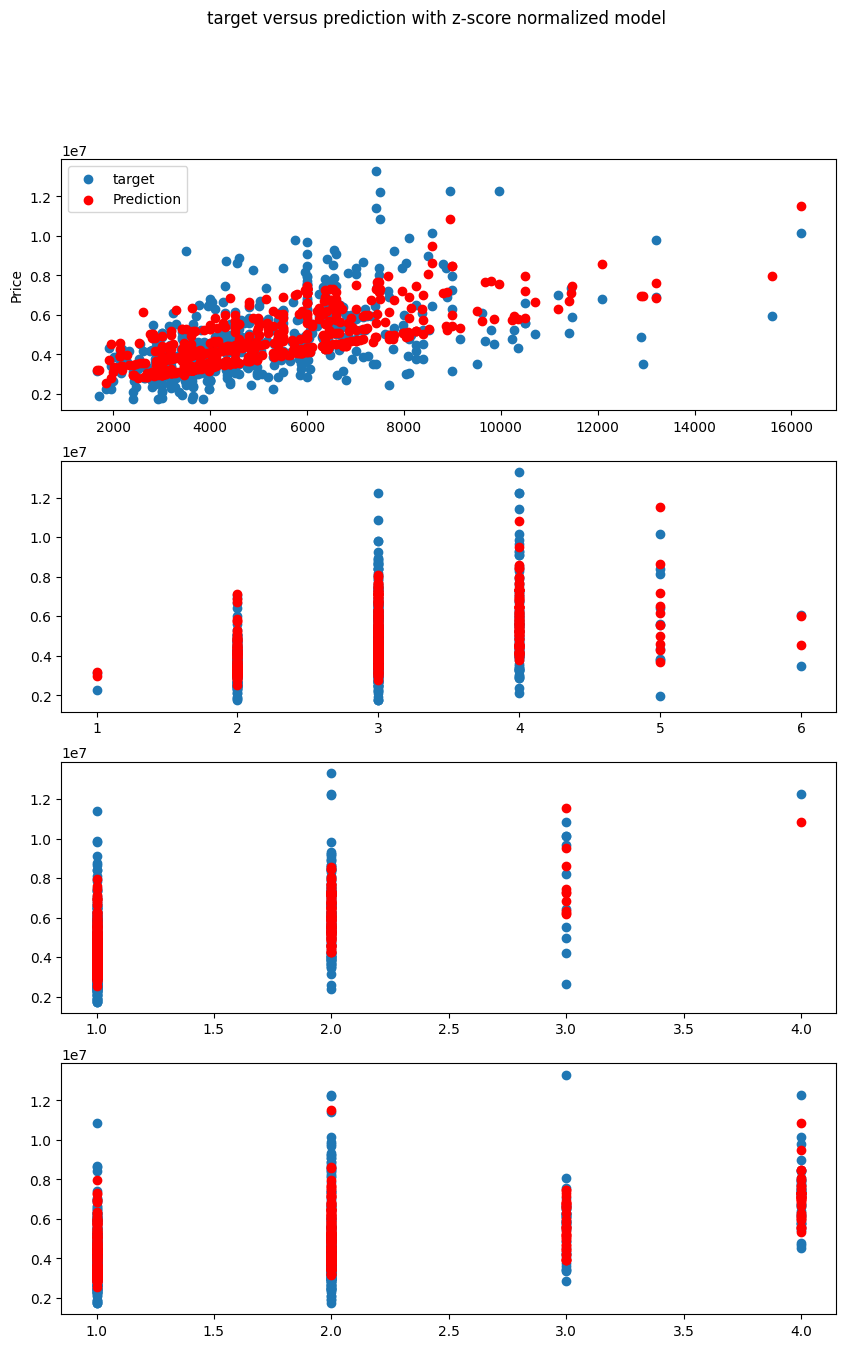

In [8]:
fig3, ax3 = plt.subplots(n,figsize=(10,15))
for i in range(n):
    ax3[i].scatter(x_data[:,i], y_data,label = 'target')
    # Prediction
    ax3[i].scatter(x_data[:,i],y_predict2,color="red",label="Prediction")
ax3[0].set_ylabel("Price"); ax3[0].legend();
fig3.suptitle("target versus prediction with z-score normalized model")
plt.show()